# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [74]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>
1.What test is appropriate for this problem? Does CLT apply?

It is appropriate to test for the independence of the frequencies of the call back for each category i.e. white callbacks and black callbacks.

Since the bionomial distribution tend towrds normal distribution for large sample size, the CLT does apply in this problem. </p>

</p>
2.What are the null and alternate hypotheses?

Null Hypothesis: There is no difference between the white callback frequency and black callback frequency
ALternative hypothesis : There is a difference between white callback frequency and black callback frequency

</p>
</div>

In [45]:
w = data[data.race=='w']
b = data[data.race=='b']
white_calls = pd.value_counts(w.call.values)
black_calls = pd.value_counts(b.call.values)

In [72]:
print(white_calls)
print(black_calls)

0.0    2200
1.0     235
dtype: int64
0.0    2278
1.0     157
dtype: int64


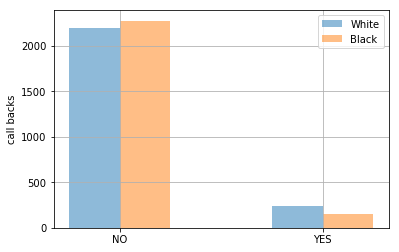

In [73]:
import matplotlib.pyplot as plt
objects = ['NO', 'YES']
pos = [0,1]
width = 0.25
fig,ax = plt.subplots()
plt.bar(pos,white_calls,width, alpha=0.5)
plt.bar([p+width for p in pos], black_calls, width, alpha=0.5)
ax.set_xticks([p + 0.5*width for p in pos])
ax.set_xticklabels(objects)
plt.ylabel('call backs')
plt.legend(['White','Black'], loc = 'upper right')
plt.grid()
plt.show()

In [126]:
# Bootstrappig approach
obs_mean = np.mean(w.call)-np.mean(b.call)
all_data = data.call
diff_mean =np.empty(1000)
for i in range(1000):
    permutate_data = np.random.permutation(all_data)
    black_data = permutate_data[:len(w)]
    white_data = permutate_data[len(w):]
    diff_mean[i] = np.mean(white_data)-np.mean(black_data)
    

p_value = np.sum(diff_mean != obs_mean)/len(diff_mean)
ci = np.percentile(diff_mean,[2.5,97.5])
print('The confidence interval and p-value are {} and {} respectively'.format(ci,p_value))

The confidence interval and p-value are [-0.01560576  0.01396304] and 1.0 respectively


In [127]:
ME = 1.96/np.sqrt(len(w))
print('The margin of error is {}'.format(ME))

The margin of error is 0.039719757521628984


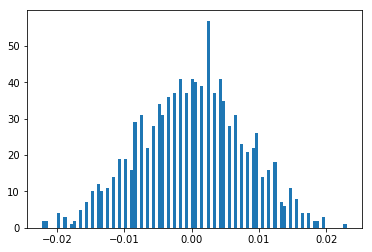

In [116]:
plt.hist(diff_mean, bins=100)
plt.show()

In [129]:
# Frequentist approach
concat_data = np.concatenate((white_calls,black_calls))
re_data = np.reshape(concat_data, [2,2])
chi_stat, p_value, dof , expected_freq = stats.chi2_contingency(re_data)
print ('The p_value of the chi square test is {}'.format(p_value))

The p_value of the chi square test is 4.997578389963255e-05


<div class="span5 alert alert-success">
<p> 
4. Write a story describing the statistical significance in the context or the original problem.

The low p_values in both chi square state and permutation test show that the difference in call backs between the black sounding names and white sounding names cannot be expected to be by chance. This means that the differnces might be influenced by other factors.
<p> 
<p> 

5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

This analysis alone cannot conclude that the race/name is the most important factor in callback success. Although, there seems to be relationship between the callback success and racial attribution of the names, this does not mean that this factor alone can be attributed to the disparity in call back success rate. First of all, categorization of names in 'black sounding' and 'white sounding' is subjective. Also, there are other factors such as experience of the candidate, education, qualifications etc, that need to be controlled for before racial bias can be analyzed.
 </p>
</div>